### ch04-07. 상자 수염 그래프

상자수염 그래프는 데이터의 불균형을 알아보기 쉽게 표현하는 그래프이다. 상자수염 그래프의 요소는 다음과 같다. 


요소       | 설명
----------|-----
제3사분위점  | 모든 데이터의 하위부터 3/4로 나눈 값(=Q3), 상자의 상부 끝
중앙값      | 모든 데이터의 하위부터 1/2로 나눈 값(=제2사분위점)
제1사분위점  | 모든 데이터의 하위부터 1/4로 나눈 값(Q1), 상자의 하부 끝
IQR       | 사분위 범위(=Q3Q1)
벗어난 값   | 수염의 하부 끝~상부 끝의 범위 외에 있는 데이터


#### 상자수염 그래프 작성하기

상자수염 그래프는 Axes.boxplot()메서드를 사용해서 작성한다. 메서드에 넘기는 데이터로 리스트형, 오브젝트를 이용할 수 있다. 다음 코드와 같이 1차원의 데이터를 부여하면 상자수염 그래프가 하나 출력된다. 

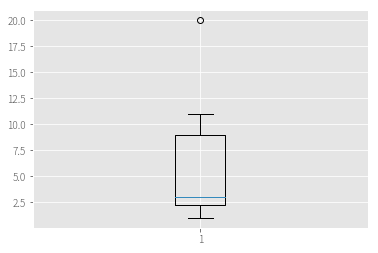

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('ggplot')

x = [1, 2, 3, 3, 11, 20]

fig = plt.figure()

ax = fig.add_subplot(111)

ax.boxplot(x)

plt.show()


##### 여려개의 상자수염 그래프를 그리는 경우

복수의 리스트를 부여하면 여러개의 상자수염 그래프를 그릴 수 있다. 다음은 두 개의 리스트를 세터하여 두 개의 상자수염 그래프가 출력된다. 

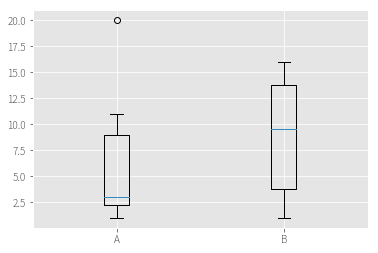

In [2]:
# 복수의 리스트를 세트

x = [[1, 2, 3, 3,11, 20], [1, 2, 9, 10, 15, 16]]

labels = ['A', 'B']

fig = plt.figure()
ax = fig.add_subplot(111)

# 데이터와 레이블 지정
ax.boxplot(x, labels = labels)

plt.show()

#### 상자수염 그래프 활용하기

실제의 데이터를 이용해서 그래프를 그린다. 데이터는 히스토그램 절에서와 같은 anime_master.csv 파일을 이용한다.

In [3]:
import pandas as pd

anime_master_csv = './anime/anime_master.csv'

df = pd.read_csv(anime_master_csv, index_col='anime_id')

df.head(3)


,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


배급 종별마다 에피소드 수의 상자수염 그래프를 작성한다. 배급 종별은 6종류이기 때문에 6개의 상자수염 그래프가 출력된다. 

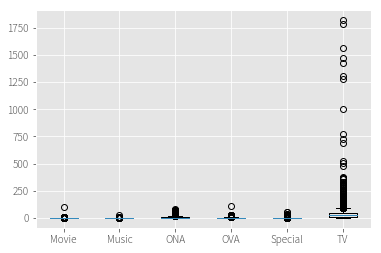

In [4]:
labels =[]
types_list = []

# 배급 종별마다 에피소드수 정보를 리스트화

for label, df_per_type in df.groupby('type'):
    labels.append(label)
    types_list.append(df_per_type['episodes'].tolist())
    
fig = plt.figure()
ax = fig.add_subplot(111)

ax.boxplot(types_list, labels = labels)

plt.show()

위 그래프에서는 테레비젼 애니메이션을 의미하는 TV에만 큰 값이 포함되어 있는 것을 확인할 수 있다. 단, 모든 값을 출력에 포함하고 있기 때문에 상세한 내용을 알기 어려운 그래프이다. 다음 코드와 같이set_ylim()메서드에서 상자수염 그래프그리기 범위를 지정하면 에피소드 수 0 부터 100까지의 값에 한전된다. 

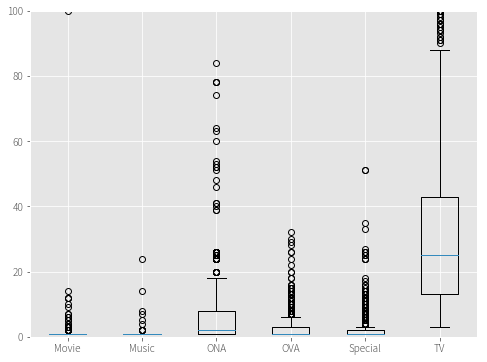

In [5]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.boxplot(types_list, labels=labels)

#y축 그리기 범위를 0부터 100까지 한정
ax.set_ylim(0, 100)

plt.show()

#### 상자수염 그래프의 서식 일괄 설정하기

상자수염 그래프의 서식은 각 요소의 서식을 사전 형식으로 부여하여 일괄로 설정할 수 있다. 요소에 따라 설정 가능한 항목이 다르지만 상자 부분은 patches.PathPatch 클래스로, 그 이외의 요소는 lines.Line2D 클래스의 인스턴스로 그려지기 때문에 각각의 서식을 적용할 수 있다. 

항목            |  설명
---------------|----------------
color          | 색
facecolor      | 채움색
linestyle      | 선 종류
linewidth      | 선 굵기
maker          | 마카
makerfacecolor | 마카 채움
makeredgecolor | 마카테두리선
makersize      | 마카 크기

- 서식을 일괄로 설정할 때 다음 1)~3)의 순서로진행한다. 

- 1) 데이터 세트 작성하기

먼저 데이터 세트를 작성한다. 

In [6]:
import numpy as np

np.random.seed(3)
dataset = [np.random.normal(20 + mu, 5, 1000) for mu in range(1, 5)]


- 2) 서식 사전 만들기

상자에 서식을 설정하기 위해서 사전을 만든다. 상자의 요소 , "벗어난 값", "상자", "수염", "수염끝단", "중앙값", "평균값"의 서식을 설정할 수 있다



In [7]:
# 서식 사전 작성

# 벗어난 값의 서식 사전
flierprop = {"color": "#EC407A",
             "marker": "o",
             "markerfacecolor": "#2196F3",
             "markeredgecolor": "white",
             "markersize": 5,
             "linestyle": "None",
             "linewidth": 0.1}
# 상자의 서식 사전
boxprop = {"color": "#2196F3", 
           "facecolor": "#BBDEFB", 
           "linewidth": 1, 
           "linestyle": "-"}
# 수염의 서식 사전
whiskerprop = {"color": "#2196F3", 
               "linewidth": 1, 
               "linestyle": "--"}
# 수염 끝단 서식 사전
capprop = {"color": "#2196F3", 
           "linewidth": 1, 
           "linestyle": ":"}
# 중앙값 서식 사전
medianprop = {"color": "#2196F3", 
              "linewidth": 2, 
              "linestyle": "-"}
# 평균값 서식 사전
meanprop = {"color": "#2196F3",
            "marker": "^",
            "markerfacecolor": "#2196F3",
            "markeredgecolor": "white",
            "markersize": 10,
            "linewidth": 1,
            "linestyle": ""}

- 3) 그리기

정의한 데이터와 서식을 사용해서 그래프를 그린다. 

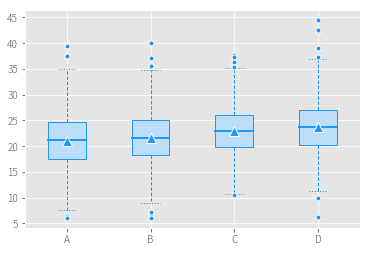

In [8]:
# 상자수염 그래프 서식 일괄 설정

fig = plt.figure()
ax = fig.add_subplot(111)

ax.boxplot(
    dataset, 
    patch_artist = 'Patch', # 서식을 설정하는 경우 "Patch"를 선택
    labels =['A', 'B', 'C', 'D'], # 항목 레이블
    showmeans = True, # 평균 값 그리기
    flierprops = flierprop, # 벗어난 값 서식 설정
    boxprops = boxprop, # 상자 서식 설정
    whiskerprops = whiskerprop, # 수염 서식 설정
    capprops = capprop, # 수염 끝단 서식 설정
    medianprops = medianprop, # 중앙값 서식 설정
    meanprops = meanprop # 평균값 서식 설정
)
plt.show()

#### 상자마다 서식 설정하기

앞에서는 모든 상자의 서식을 일괄로 설정했는데 서식을 개별로 설정하는 것도 가능하다. 상자의 서식을 요소마다 설정하는 경우에는 항목에 접두사 set을 붙여서 이용한다. 다음 코드에는 다음의 순서로 서식을 설정해서 그린다.

1) 그림 그리기
2) 상자 요소 수와 같은 요소 수의 색 셋트(컬러 셋트) (colors1과 colors2)를 작성하기
3) 위쪽과 아래쪽이 나눠져 있는 요소의 서식 설정용에 수열 리스트 n을 작성하기
4) 상자와 벗어난 값, 중앙값(요소가 상하로 나눠져 있는 것 상하 다른 색을 설정할 수 있는 것)의 서식 설정하기
5)  수염과 수염의 끝단(요소가 상하로 나눠져 있는 것 상하 다른 색을 설정할 수 있는 것)의 서식 설정하기
6) 평균값의 서식 설정하기

또한 서식 설정을 하기 위해서 "patch_artist = "Patch"를 설정한다. 

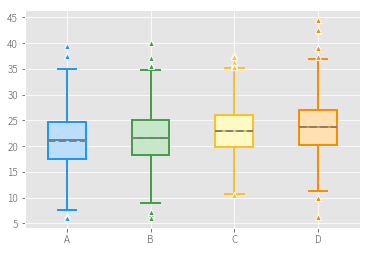

In [9]:
# 그림 그리기

fig = plt.figure()
ax = fig.add_subplot(111)
bp = ax.boxplot(
    dataset,
    patch_artist="Patch",
    labels=["A", "B", "C", "D"],
    meanline=True,
    showmeans=True,
)

# 컬러세트
colors1 = ["#2196F3", "#43A047", "#FBC02D", "#FB8C00"]
colors2 = ["#BBDEFB", "#C8E6C9", "#FFF9C4", "#FFE0B2"]

# 위 아래로나뉘어진 요소에 설정하기 위해 용도의 수열
n = [0, 0, 1, 1, 2, 2, 3, 3]

# 서식 설정
# 상자와 벗어난 값, 중앙값의 서식 설정
for params in zip(bp["boxes"], bp["fliers"], bp["medians"], colors1, colors2):
    bpb, bpf, med, color1, color2 = params
    # 상자 서식 설정
    bpb.set_color(color1)
    bpb.set_facecolor(color2)
    bpb.set_linewidth(2)
    # 벗어난 값 서식 설정
    bpf.set(marker="^", color=color2)
    bpf.set_markeredgecolor("white")
    bpf.set_markerfacecolor(color1)
    # 중앙값 서식 설정
    med.set_color(color1)
    med.set_linewidth(2)

    
# 수염과 수염 끝단 서식 설정
for bpc, bpw, m in zip(bp['caps'], bp['whiskers'], n):
    bpc.set_color(colors1[m])
    bpc.set_linewidth(2)
    bpw.set_color(colors1[m])
    bpw.set_linewidth(2)
    
# 평균값 서식 설정
for mean, color2 in zip(bp['means'], colors2):
    mean.set_color('grey')
    mean.set_linewidth(2)
    mean.set_linestyle('--')
    
plt.show()    